In [1]:
# Install specific depencencies
%pip install numpy gym matplotlib pillow ipywidgets gym  --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
from snakeandladders import SnakeAndLadders, GameMode
from agents.OnPolicyMCAgent import OnPolicyMonteCarloAgent
from agents.QLearningAgent import QLearningAgent
from agents.SARSAAgent import SARSAAgent

from IPython.display import Image as PImage
from IPython.display import display
import ipywidgets as widgets
import numpy as np
from datetime import datetime
import os
plt.style.use('ggplot')

In [3]:
# This method is used to generate visualizations of the given agent's optimal policy.
def generate_policy_gif(env, agent ,filename):

    gif_frames = []
    states = []
    next_state = env.reset()
    done = False
    while not done:
      states.append(next_state)
      action = agent.get_optimal_action(next_state)
      next_state, reward, done, _ = env.step(action)
      gif_frames.append(env.render(mode='rgb_array'))
      
    print(f'For Agent type: {agent_type.__name__}, Environment mode: {env.game_mode_readable} Total steps: {len(gif_frames)}') # print type of agent and environment

    # create gif directory if it doesn't exist
    gif_dir = 'generated/gifs'
    if not os.path.exists(gif_dir):
        os.makedirs(gif_dir)
    
    gif_frames[0].save(
        f'generated/gifs/{filename}',
        format="GIF",
        append_images=gif_frames[1:],
        save_all=True,
        duration=1500,
        loop=0
    )
    return f'generated/gifs/{filename}'

In [4]:
def test_environment(env, agent, episodes = 10, mode = 'random', visualization= True, output= True):
    iterations = []
    rewards_per_episode = []
    print(f'For environment mode after taking 10 {mode} steps by the agent, {env.game_mode}:')

    for episode in range(episodes):
        rewards = []
        done = False
        state = env.reset()
        i = 0
        while not done:
            if mode == 'random':
                next_step = env.action_space.sample()
            else :
                next_step = agent.get_optimal_action(env.state)

            state, reward, done, _ = env.step(next_step)
            if output:
                print(f'Step {i+1}: After taking a step of {next_step}, current position is {state}, received a reward of {reward}')
            rewards.append((0 if i == 0 else rewards[i-1]) + reward)
            iterations.append(i)
            rewards_per_episode.append(0) if done else rewards_per_episode.append(reward)
            i = i + 1
            if done:
                print(f'Episode {episode  + 1} finished after {env.steps} steps, received a reward of {rewards[-1]}')

    if visualization:
        plt.plot(iterations, rewards)
        plt.title('Cumulative reward with steps')
        plt.ylabel('reward')
        plt.xlabel('step')
        plt.show()
        env.render()
    return iterations, rewards, rewards_per_episode

# Various decay functions
def step_decay(epsilon, episode, max_episodes):
    return 1 * (0.7 ** ( (1 + episode) // (max_episodes/10)))

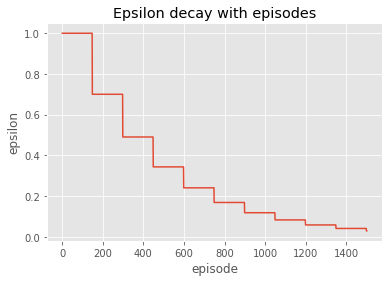

In [5]:
# Decay function for all is step decay, plotting the graph
plt.plot(np.arange(1, 1501, 1), [step_decay(0.7, i, 1500) for i in np.arange(1, 1501, 1)])
plt.title('Epsilon decay with episodes')
plt.ylabel('epsilon')
plt.xlabel('episode')
plt.show()

For environment mode after taking 10 random steps by the agent, GameMode.STOCHASTIC:
Step 1: After taking a step of 3, current position is 3, received a reward of -1
Step 2: After taking a step of 6, current position is 31, received a reward of 1
Step 3: After taking a step of 4, current position is 35, received a reward of -1
Step 4: After taking a step of 1, current position is 36, received a reward of -1
Step 5: After taking a step of 1, current position is 40, received a reward of -1
Step 6: After taking a step of 4, current position is 44, received a reward of -1
Step 7: After taking a step of 6, current position is 45, received a reward of -1
Step 8: After taking a step of 5, current position is 50, received a reward of -1
Step 9: After taking a step of 5, current position is 52, received a reward of -1
Step 10: After taking a step of 3, current position is 55, received a reward of -1
Step 11: After taking a step of 3, current position is 58, received a reward of -1
Step 12: Afte

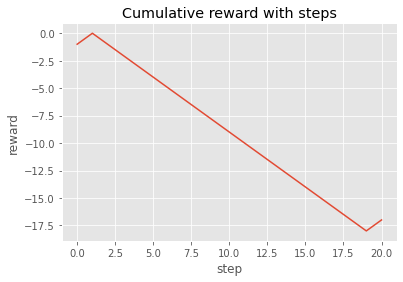

Current state:  100
Current done:  True
Current steps:  21




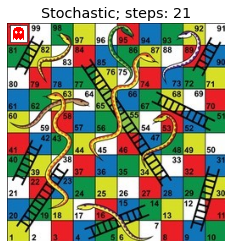

In [6]:
env = SnakeAndLadders(game_mode= GameMode.STOCHASTIC)
env.reset()
_, _, _ = test_environment(env, None, episodes=1,mode = 'random')

<>:19: DeprecationWarning: invalid escape sequence \c


For Agent type: SARSAAgent, Environment mode: Deterministic Total steps: 8
For environment mode after taking 10 optimal steps by the agent, GameMode.DETERMINISTIC:
Episode 1 finished after 8 steps, received a reward of 2
Episode 2 finished after 8 steps, received a reward of 2
Episode 3 finished after 8 steps, received a reward of 2
Episode 4 finished after 8 steps, received a reward of 2
Episode 5 finished after 8 steps, received a reward of 2
Episode 6 finished after 8 steps, received a reward of 2
Episode 7 finished after 8 steps, received a reward of 2
Episode 8 finished after 8 steps, received a reward of 2
Episode 9 finished after 8 steps, received a reward of 2
Episode 10 finished after 8 steps, received a reward of 2
For Agent type: SARSAAgent, Environment mode: Stochastic Total steps: 12
For environment mode after taking 10 optimal steps by the agent, GameMode.STOCHASTIC:
Episode 1 finished after 9 steps, received a reward of 1
Episode 2 finished after 10 steps, received a rew

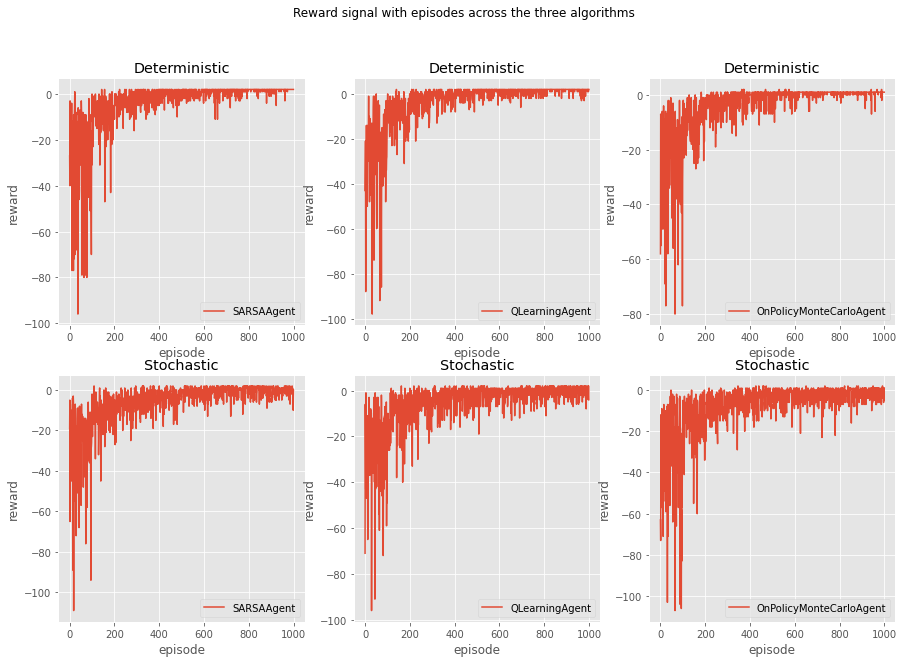

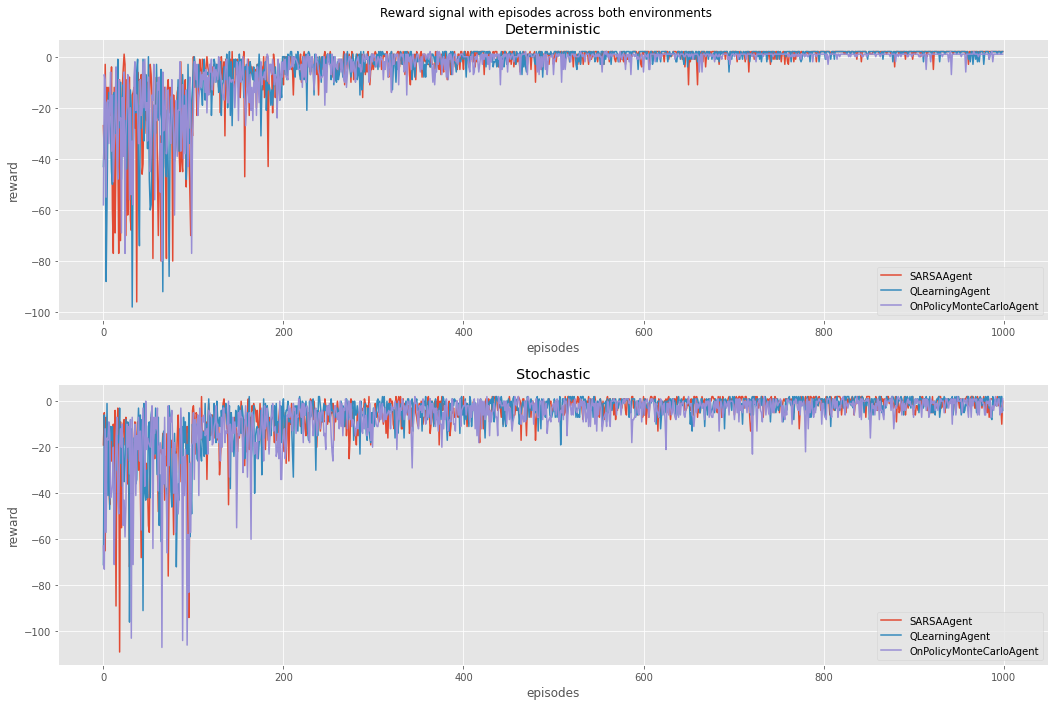

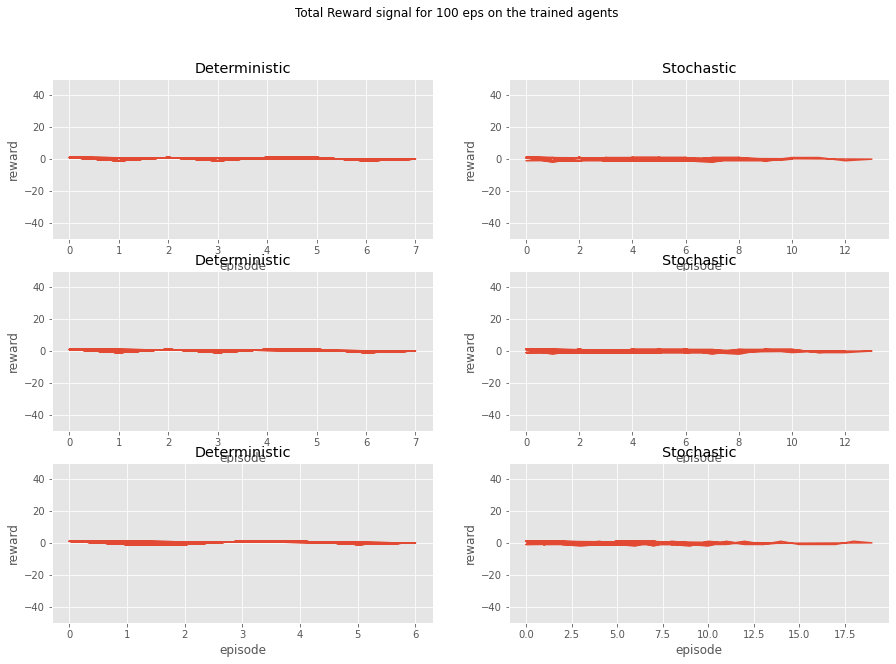

In [7]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
widgets_ = [] # collecting image widgets

fig1, (ax1, ax2) = plt.subplots(nrows=2)
fig1.set_size_inches(15, 10)
ax1.set_title('Deterministic')
ax2.set_title('Stochastic')
axes = [ax1, ax2]
# give padding to the plots
fig1.tight_layout(pad=3.0)

fig3, axs3 = plt.subplots(3, 2)
fig3.set_size_inches(15, 10)

# define a matplotlib plot for the total reward per episode
for j, agent_type in enumerate([SARSAAgent,QLearningAgent, OnPolicyMonteCarloAgent]):

    widgets_.append(widgets.Label(value = '$\color{red}{' + f'Agent type: {agent_type.__name__}' + '}$'))
    
    for i, game_mode in enumerate([ GameMode.DETERMINISTIC, GameMode.STOCHASTIC]):

        env = SnakeAndLadders(game_mode=game_mode)
        agent = agent_type(env, epsilon=0.3, epsilon_decay_generator=step_decay)
        agent.train(episodes=1000)

        # refresh image cache by adding timestamp with milli seconds to filename
        filename = f'{agent_type.__name__}_{game_mode.name}_{datetime.now().strftime("%Y%m%d-%H%M%S%f")}.gif'
        file_path = generate_policy_gif(env, agent, filename=filename)

        img1=open(file_path,'rb').read()
        widgets_.append(widgets.Image(value=img1, format='.gif'))

        # Run a new env for 100 episodes
        env.reset()
        ten_iterations, ten_cumulative_rewards, ten_rewards = test_environment(env, agent, episodes=10, mode = 'optimal', visualization=False, output=False)
        
        axs3[j][i].plot(ten_iterations, ten_rewards)
        axs3[j][i].set_title(f'{env.game_mode_readable}')
        axs3[j][i].set_xlabel('episode')
        axs3[j][i].set_ylabel('reward')
        axs3[j][i].set_ylim(-50, 50)
        
        axs[i , j].plot(agent.episodic_rewards, label=f'{agent_type.__name__}')
        # plot episodic rewards 
        axs[i , j].set_title(f'{env.game_mode_readable}')
        axs[i , j].set_xlabel('episode')
        axs[i , j].set_ylabel('reward')


        axes[i].set_xlabel('episodes')
        axes[i].set_ylabel('reward')
        axes[i].plot(agent.episodic_rewards, label = f'{agent_type.__name__}')

fig.suptitle('Reward signal with episodes across the three algorithms')
fig1.suptitle('Reward signal with episodes across both environments')
fig3.suptitle('Total Reward signal for 100 eps on the trained agents')

ax1.legend()
ax2.legend()

for row in axs:
    for col in row:
        col.legend()
box_layout = widgets.Layout(display='flex',flex_flow='column',align_items='center')
left_box = widgets.VBox([widgets_[0], widgets_[1], widgets_[2]], layout=box_layout)
right_box = widgets.VBox([widgets_[3], widgets_[4], widgets_[5]] ,layout=box_layout)
right_most_box = widgets.VBox([widgets_[6], widgets_[7], widgets_[8]] ,layout=box_layout)

display(widgets.HBox([left_box, right_box, right_most_box]))
plt.show()

<center>Hyper Parameter Tuning</center>

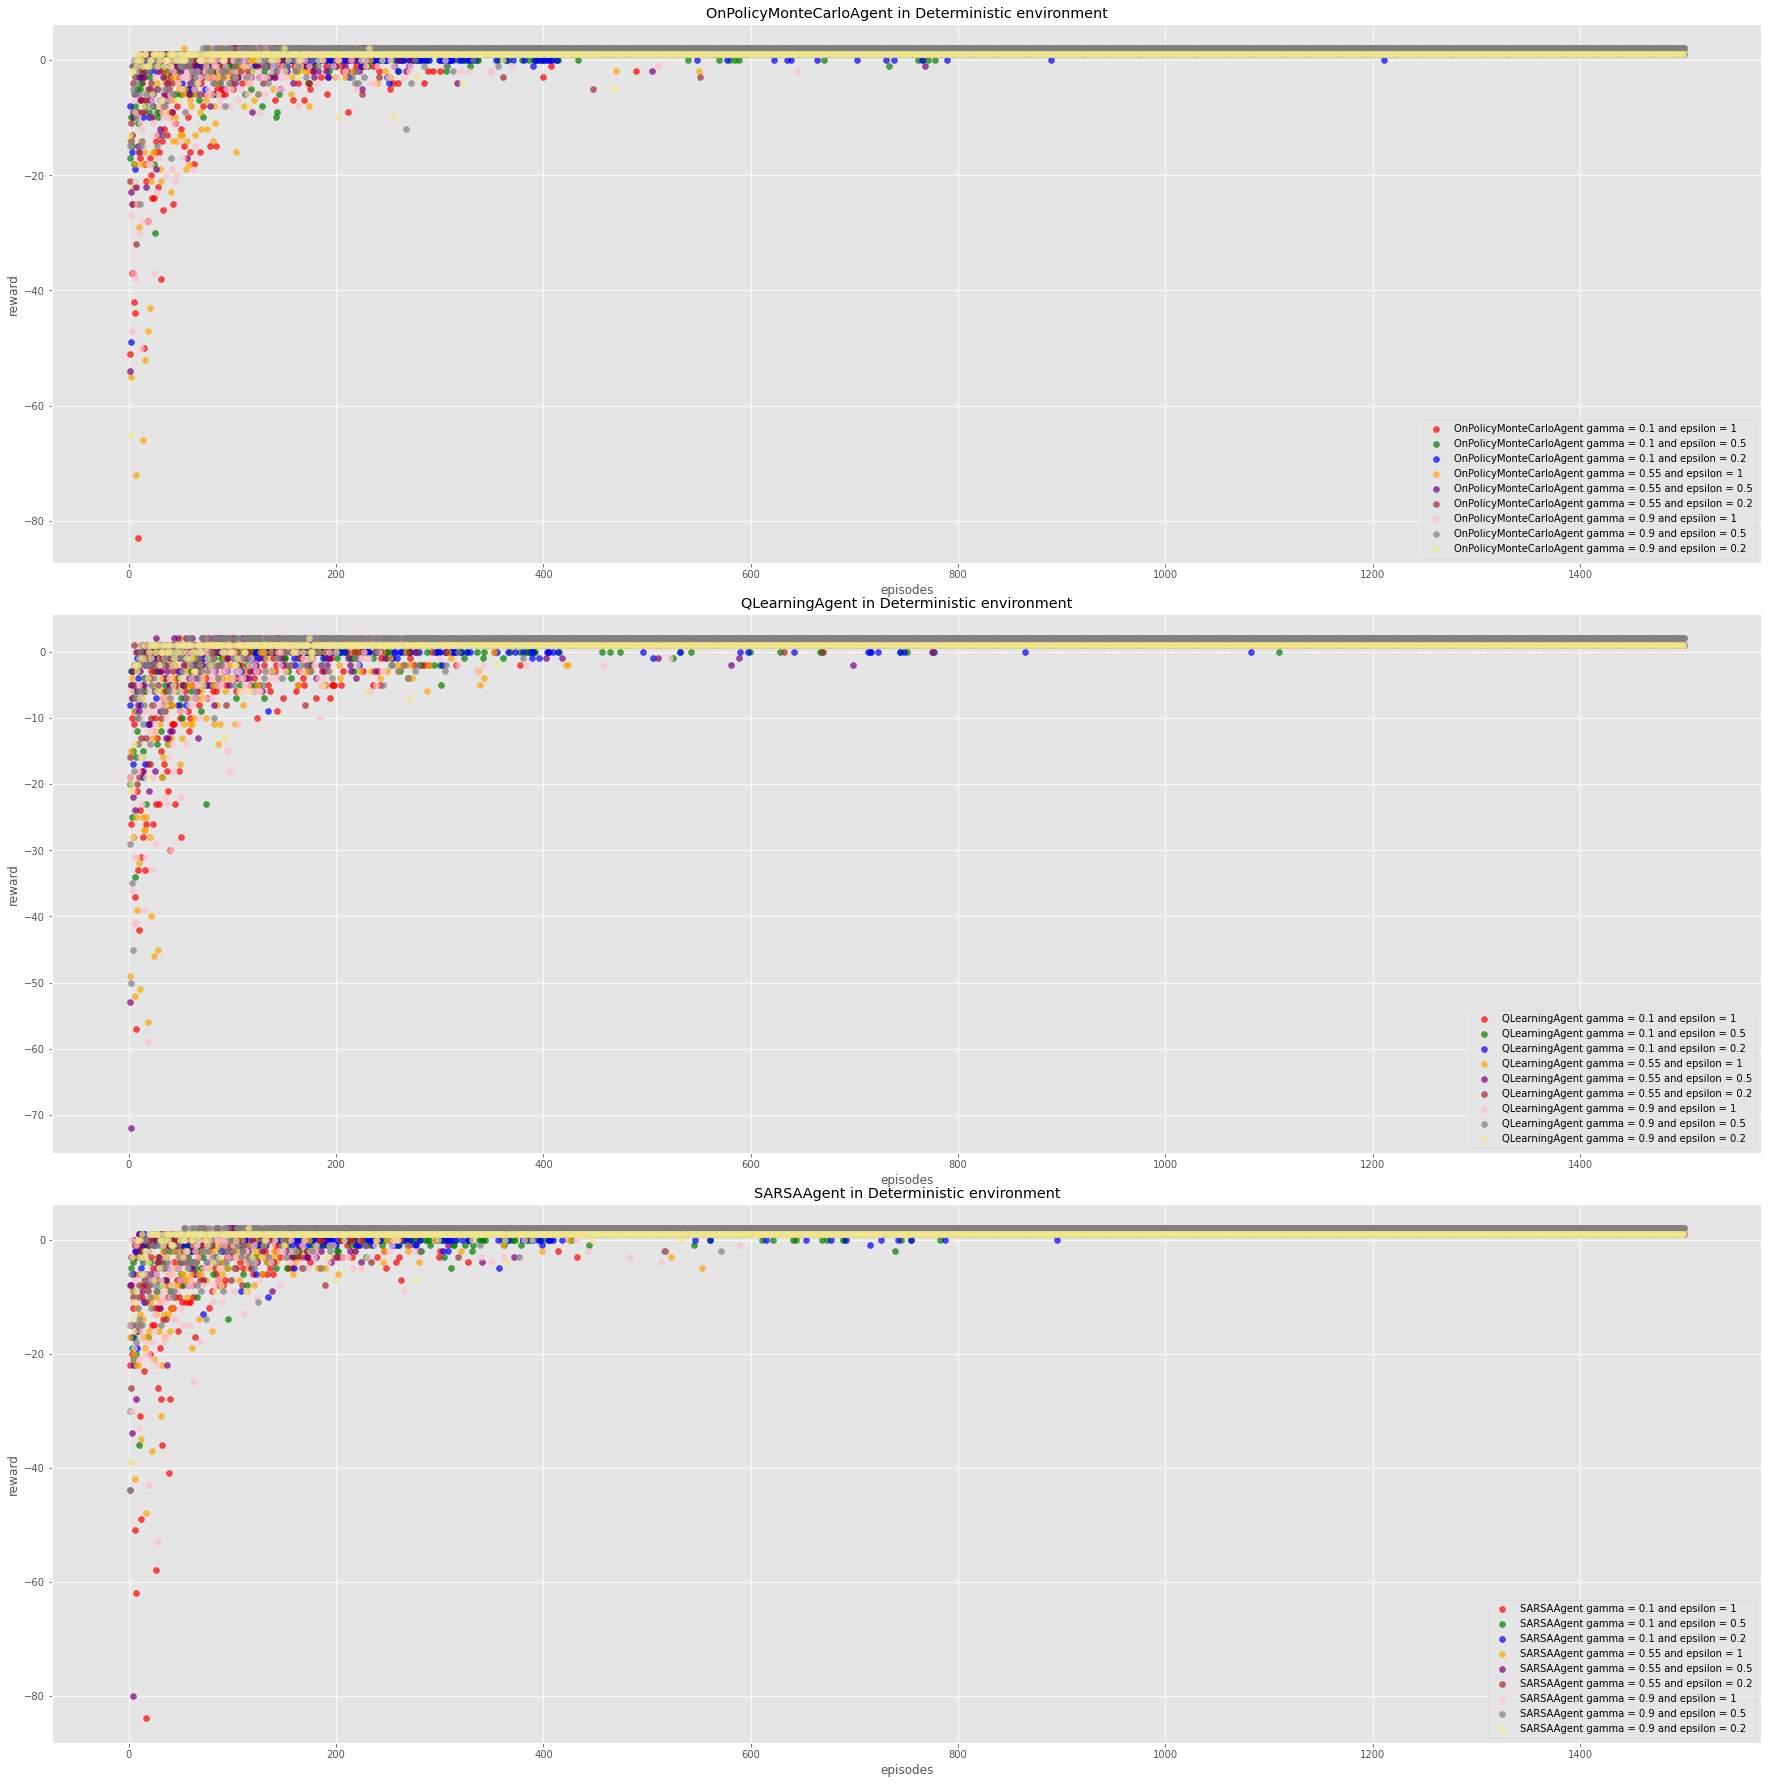

In [8]:

gammas = [0.1, 0.55, 0.9]
epsilons = [1, 0.5, 0.20]


fig1, (ax1, ax2,ax3) = plt.subplots(nrows=3)
fig1.set_size_inches(25, 25)
axes = [ax1, ax2, ax3]
# give padding to the plots
fig1.tight_layout(pad=3.0)


count = 0
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray',   'khaki']
for j, agent_type in enumerate([OnPolicyMonteCarloAgent, QLearningAgent, SARSAAgent]):
    for i, game_mode in enumerate([GameMode.STOCHASTIC]):
        count_ = 0
        for gamma in gammas:
            for epsilon in epsilons:
                
                env = SnakeAndLadders(game_mode=GameMode.DETERMINISTIC)
                agent = QLearningAgent(env, gamma=gamma, epsilon=epsilon)
                agent.train(episodes=1500)

                # for each i,j plot the episodic rewards
                axes[count].set_xlabel('episodes')
                axes[count].set_ylabel('reward')
                axes[count].set_title(f'{agent_type.__name__} in {env.game_mode_readable} environment')
                # axes[count].plot(agent.episodic_rewards, label = f'{agent_type.__name__} gamma = {gamma} and epsilon = {epsilon}', alpha=0.7)
                # scatter for each episode the reward
                axes[count].scatter( range(1,1501) , agent.episodic_rewards, label = f'{agent_type.__name__} gamma = {gamma} and epsilon = {epsilon}', alpha=0.7, color=colors[count_])
                axes[count].legend()
                count_ += 1
        count += 1
plt.show()